In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
def generate_hypersphere_vectors(p, R, N):
    """
    Generate N random vectors uniformly distributed in a p-dimensional hypersphere of radius R.
    
    Args:
        p: dimension
        R: radius
        N: number of samples
    
    Returns:
        vectors: array of shape (N, p) containing the random vectors
        norms: array of shape (N,) containing the norms of the vectors
    """

    vectors = np.random.normal(0, 1, (N, p))
    
    norms = np.linalg.norm(vectors, axis=1)
    
    u = np.random.uniform(0, 1, N)
    radii = R * (u ** (1/p))
    
    vectors = vectors / norms[:, np.newaxis] * radii[:, np.newaxis]
    
    norms = np.linalg.norm(vectors, axis=1)
    
    return vectors, norms

In [4]:
def generate_hypersphere_surface_vectors(p, N):
    """
    Generate N random vectors uniformly distributed on the surface of a p-dimensional hypersphere of radius 1.
    
    Args:
        p: dimension
        N: number of samples
    
    Returns:
        vectors: array of shape (N, p) containing the surface vectors
        dot_products: array containing all pairwise dot products
    """
    vectors = np.random.normal(0, 1, (N, p))
    
    norms = np.linalg.norm(vectors, axis=1)
    vectors = vectors / norms[:, np.newaxis]
    
    dot_products = []
    for i in range(N):
        for j in range(i+1, N):
            dot_product = np.dot(vectors[i], vectors[j])
            dot_products.append(dot_product)
    
    return vectors, np.array(dot_products)

In [5]:
def analyze_first_component(p, R, N):
    """
    Generate N random vectors in p-dimensional hypersphere and analyze first component.
    
    Args:
        p: dimension
        R: radius
        N: number of samples
    
    Returns:
        first_components: array of absolute values of first components
    """
    vectors, _ = generate_hypersphere_vectors(p, R, N)
    first_components = np.abs(vectors[:, 0])
    return first_components

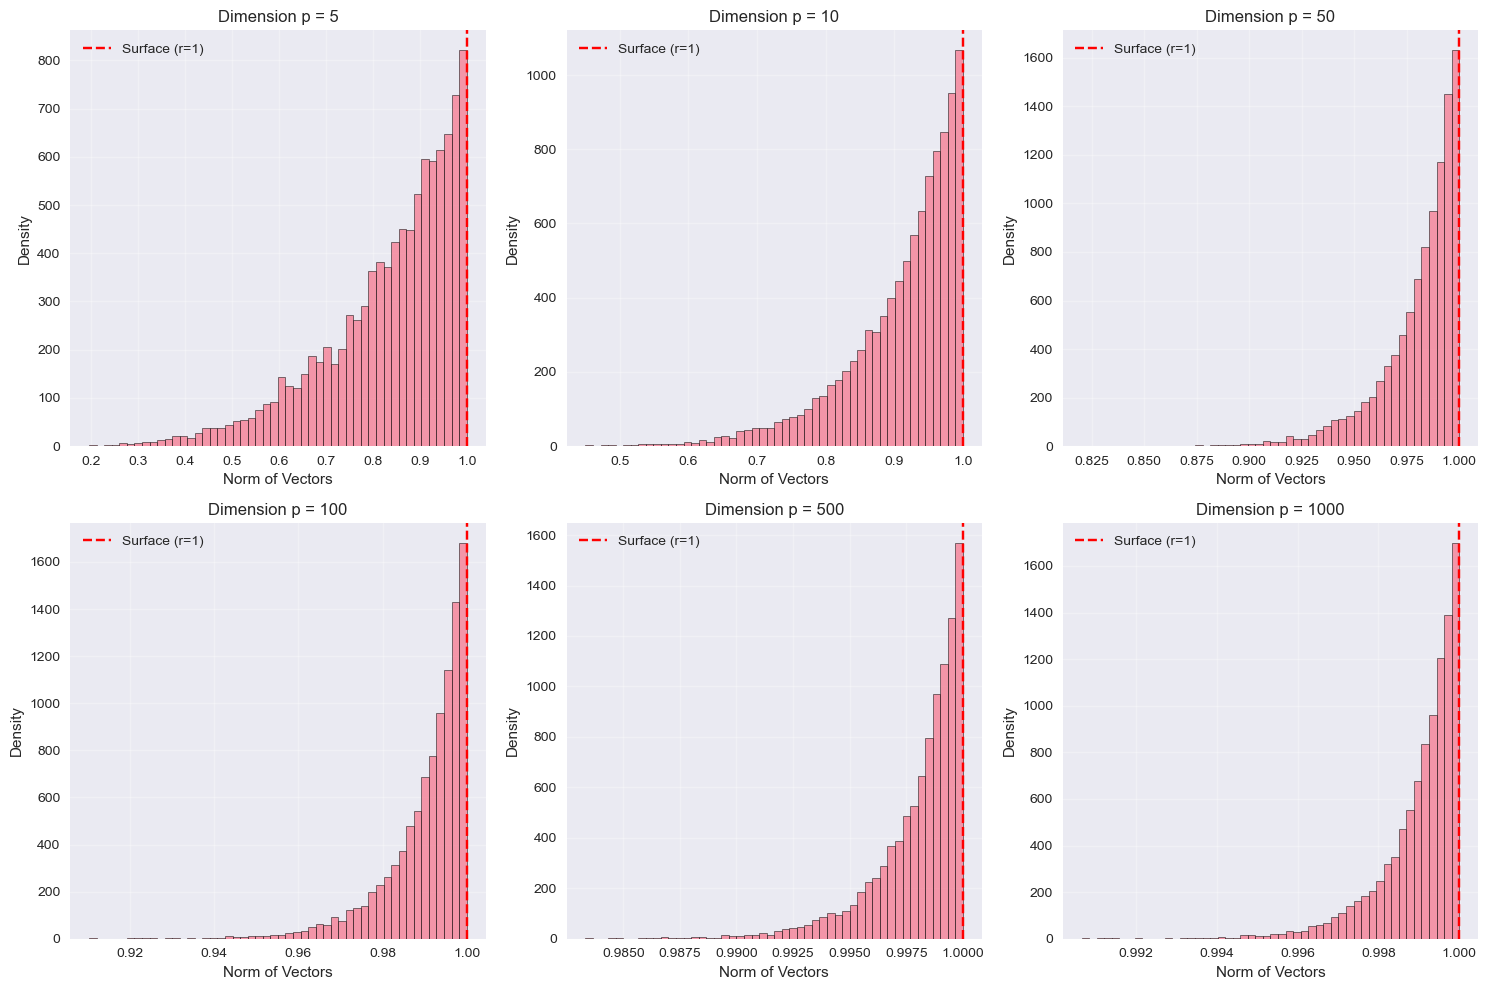

In [6]:
# Analysis 1: Volume concentration near surface

dimensions_1 = [5, 10, 50, 100, 500, 1000]
fig1, axes1 = plt.subplots(2, 3, figsize=(15, 10))

# dimensions_1 = [10, 100]
# fig1, axes1 = plt.subplots(1, 2, figsize=(10, 5))

axes1 = axes1.ravel()

R = 1
N = 10000

for i, p in enumerate(dimensions_1):
    vectors, norms = generate_hypersphere_vectors(p, R, N)
    
    axes1[i].hist(norms, bins=50, alpha=0.7, density=False, edgecolor='black', linewidth=0.5)
    axes1[i].set_title(f'Dimension p = {p}')
    axes1[i].set_xlabel('Norm of Vectors')
    axes1[i].set_ylabel('Density')
    axes1[i].axvline(R, color='red', linestyle='--', label=f'Surface (r={R})')
    axes1[i].legend()
    axes1[i].grid(True, alpha=0.3)
    
plt.tight_layout()
#plt.suptitle('Distribution of Vector Norms in Hyperspheres\n(Volume concentrates near surface in high dimensions)', 
#             fontsize=14, y=1.1)
plt.show()

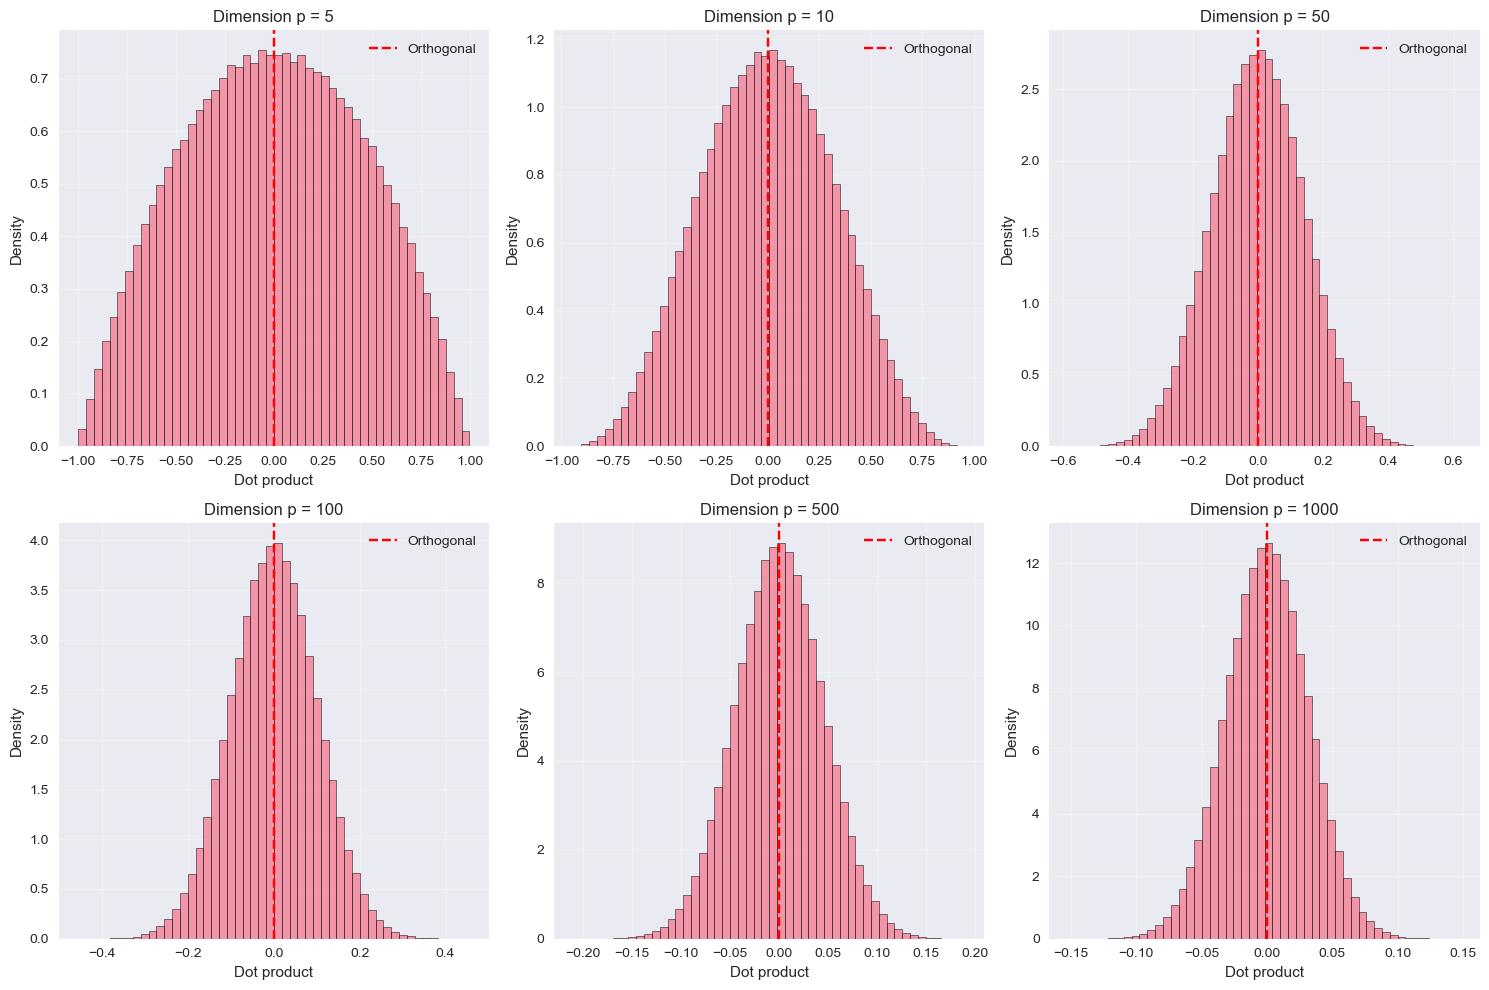

In [9]:
# Analysis 2: Orthogonality of random vectors

dimensions_2 = [5, 10, 50, 100, 500, 1000]
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))

# dimensions_2 = [10, 100, 1000]
# fig2, axes2 = plt.subplots(1, 3, figsize=(10, 5))
axes2 = axes2.ravel()

N = 1000

for i, p in enumerate(dimensions_2):
    vectors, dot_products = generate_hypersphere_surface_vectors(p, N)
    
    axes2[i].hist(dot_products, bins=50, alpha=0.7, density=True, edgecolor='black', linewidth=0.5)
    axes2[i].set_title(f'Dimension p = {p}')
    axes2[i].set_xlabel('Dot product')
    axes2[i].set_ylabel('Density')
    axes2[i].axvline(0, color='red', linestyle='--', label='Orthogonal')
    axes2[i].legend()
    axes2[i].grid(True, alpha=0.3)
    

plt.tight_layout()
#plt.suptitle('Distribution of Dot Products Between Random Surface Vectors\n(Vectors become nearly orthogonal in high dimensions)', 
#             fontsize=14, y=1.1)
plt.show()



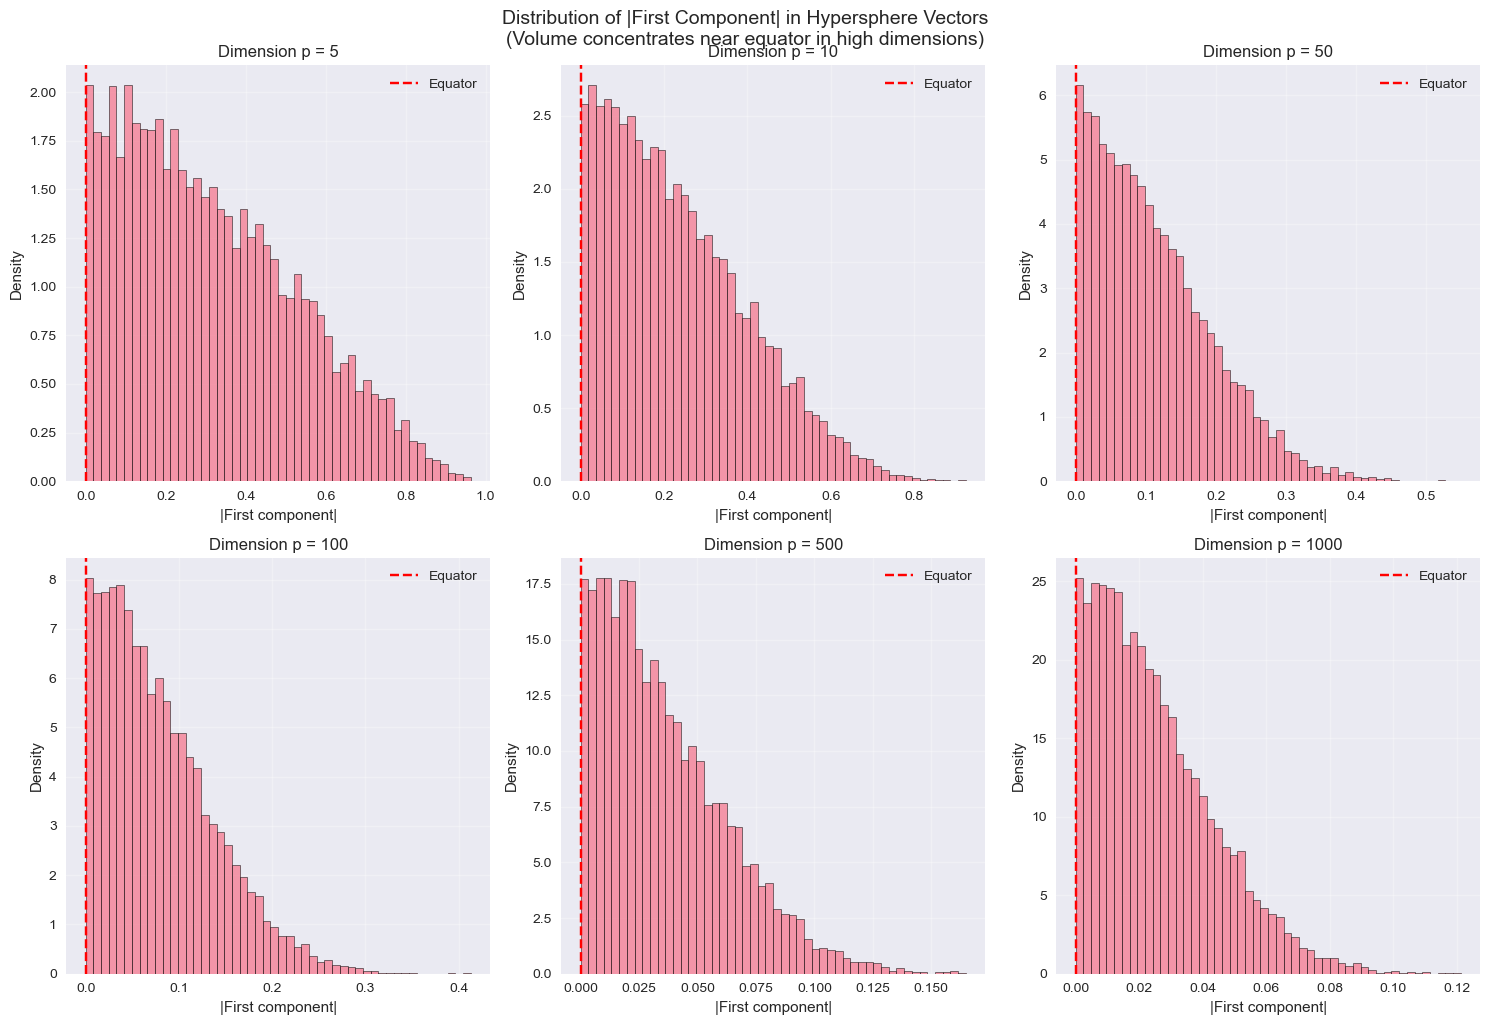

In [8]:
# Analysis 3: Concentration near equator

dimensions_3 = [5, 10, 50, 100, 500, 1000]
fig3, axes3 = plt.subplots(2, 3, figsize=(15, 10))
axes3 = axes3.ravel()

R = 1
N = 10000

for i, p in enumerate(dimensions_3):
    first_components = analyze_first_component(p, R, N)
    
    axes3[i].hist(first_components, bins=50, alpha=0.7, density=True, edgecolor='black', linewidth=0.5)
    axes3[i].set_title(f'Dimension p = {p}')
    axes3[i].set_xlabel('|First component|')
    axes3[i].set_ylabel('Density')
    axes3[i].axvline(0, color='red', linestyle='--', label='Equator')
    axes3[i].legend()
    axes3[i].grid(True, alpha=0.3)
    
plt.tight_layout()
plt.suptitle('Distribution of |First Component| in Hypersphere Vectors\n(Volume concentrates near equator in high dimensions)', 
             fontsize=14, y=1.02)
plt.show()